In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np

# Class object for Linear Regression

In [2]:
class Linear_Regression():

   def __init__( self, learning_rate, no_of_iterations ):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations

        
   def fit( self, X, Y):    
        self.n, self.d = X.shape # no_of_training_data, no_of_features
        print(X.shape)
        
        # initialize weights
        self.w = np.zeros(self.d)   #self.w = np.random.rand(self.d)       
        self.b = 0      #np.random.rand()
        self.X = X
        self.Y = Y
        
        # Gradient
        for i in range(self.no_of_iterations):
            prediction = self.predict(self.X)
            
            #cost function
            #J_w = np.sum(np.power((self.Y - prediction),2)) * (1/self.n)
            #J_w = (np.dot((self.Y - prediction),(self.Y - prediction))) * (1/self.n)
            J_w = ((self.Y - prediction).dot(self.Y - prediction)) * (1/self.n)  
            print("Cost: ", J_w)

            self.update_weights(prediction)        
      
   def update_weights(self, prediction) :
          
        d_Jw = ((self.X.T).dot(prediction - self.Y))*(1/self.n) #rate of change of cost with respect to w
        d_Jb = np.sum(prediction - self.Y)*(1/self.n)  #rate of change of cost with respect to b
        
        # updating the weights
        self.w = (self.w - self.learning_rate * d_Jw)
        self.b = (self.b - self.learning_rate * d_Jb)
      
   # function for prediction:
   def predict(self, X):   
        return X.dot(self.w) + self.b

# Load Data 

In [3]:
data = pd.read_csv('Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [4]:
# Drop null values
data = data.dropna()
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
#convert to numpy array
X = data[['YearsExperience']].to_numpy()
Y = data['Salary'].to_numpy()
Y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872], dtype=int64)

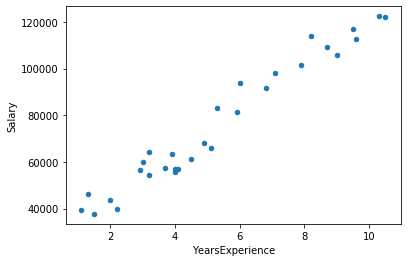

In [6]:
data.plot(kind='scatter', x='YearsExperience', y='Salary')
#plt.scatter(data['YearsExperience'], data['Salary'], color='b')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

plt.show()

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.7,random_state=100)

# Linear Regression Library function

In [8]:
model = linear_model.LinearRegression()
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
print("Coefficients: ",model.coef_)
print("Intercept: ",model.intercept_)

Coefficients:  [9449.96232146]
Intercept:  25792.20019866871


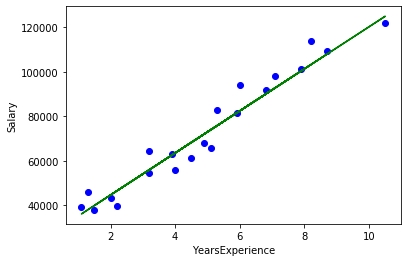

In [10]:
plt.scatter(X_train, Y_train, color='b')
plt.plot(X_train, model.predict(X_train), color='g')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

# Custom Linear Regression model

In [11]:
model_2 = Linear_Regression(learning_rate=0.01, no_of_iterations=1000)
model_2.fit(X_train, Y_train)

(21, 1)
Cost:  5999709120.761905
Cost:  2884805146.900396
Cost:  1427416249.0825288
Cost:  745405941.8165181
Cost:  426115038.72379637
Cost:  276503563.6147176
Cost:  206268344.7834263
Cost:  173165990.85289392
Cost:  157435243.2888657
Cost:  149831876.59726658
Cost:  146031482.49873903
Cost:  144011119.4331034
Cost:  142824460.85960352
Cost:  142028815.55497128
Cost:  141417090.47967106
Cost:  140892404.3028604
Cost:  140409432.2156517
Cost:  139946967.31833455
Cost:  139495084.9699356
Cost:  139049138.33294174
Cost:  138606949.51808652
Cost:  138167495.6153913
Cost:  137730294.0257696
Cost:  137295114.92205113
Cost:  136861846.73956874
Cost:  136430433.25323397
Cost:  136000844.14242604
Cost:  135573061.22131923
Cost:  135147071.99742588
Cost:  134722866.65824416
Cost:  134300436.66155657
Cost:  133879774.07590923
Cost:  133460871.2720216
Cost:  133043720.77836141
Cost:  132628315.21351396
Cost:  132214647.25447682
Cost:  131802709.62176052
Cost:  131392495.07235064
Cost:  130983996.

In [12]:
print("Coefficients:\n",model_2.w)
print("Intercept: ",model_2.b)

Coefficients:
 [10186.65578733]
Intercept:  22369.238630029322


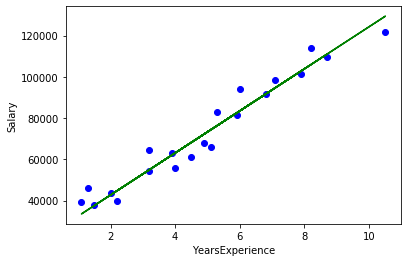

In [13]:
plt.scatter(X_train, Y_train, color='b')
#plt.plot(X_test, y_pred, color='r')
plt.plot(X_train, model_2.predict(X_train), color='g')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

In [14]:
model_2.predict(np.array([[5]]))

array([73302.51756669])

In [15]:
Y_predict = model_2.predict(X_test)

In [16]:
data_frame = pd.DataFrame({"Y_test": Y_test, "Y_predict": Y_predict})
data_frame

,Y_test,Y_predict
0,57189,60059.865043
1,116969,119142.468610
2,122391,127291.793240
3,57081,64134.527358
4,56642,51910.540413
5,56957,63115.861779
6,112635,120161.134188
7,105582,114049.140716
8,60150,52929.205992
